In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("C:/Python36/Projects/age detection/train.csv")

In [3]:
data.head(100)


,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
...,...,...
95,12619.jpg,YOUNG
96,5843.jpg,MIDDLE
97,20147.jpg,OLD
98,15364.jpg,MIDDLE


In [4]:
data.shape

(19906, 2)

In [5]:
data['Class']=data['Class'].astype('category')
data['age'] = data['Class'].cat.codes

In [6]:
data.head()

,ID,Class,age
0,377.jpg,MIDDLE,0
1,17814.jpg,YOUNG,2
2,21283.jpg,MIDDLE,0
3,16496.jpg,YOUNG,2
4,4487.jpg,MIDDLE,0


In [7]:
import cv2 as cv2

In [8]:
def show_photo(img):
    plt.imshow(img,cmap='gray')
    plt.show()

In [10]:
photos = [cv2.resize(cv2.imread("C:/Python36/Projects/age detection/Train/"+s ,  0),(40,40)) for s in data["ID"]]
photos = [tf.keras.utils.normalize(p) for p in photos]

In [11]:
photos = np.array(photos)
photos.shape
photos = photos.reshape(19906,40,40,1)
photos.shape

(19906, 40, 40, 1)

In [12]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

model = tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size = (2,2) , activation = 'relu' , input_shape = (40,40,1)))
model.add(Conv2D(40, kernel_size = (2,2) , activation = 'relu' ))
model.add(Dropout(0.15))
model.add(Conv2D(64, kernel_size = (2,2) , activation = 'relu'  ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(80, kernel_size = (2,2) , activation = 'relu'  ))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.4))
model.add(Dense(3,activation = "softmax"))


In [13]:
model.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy" , metrics = ["sparse_categorical_accuracy", "mae"])

In [16]:
xtrain=photos
ytrain = data["age"].values
data['age'].shape


(19906,)

In [17]:
model.fit(xtrain,ytrain,epochs = 15,batch_size=128,callbacks=[tf.keras.callbacks.TensorBoard('logs',histogram_freq=1)])

Train on 19906 samples
Epoch 1/15
19906/19906 [==============================] - 68s 3ms/sample - loss: 0.9302 - sparse_categorical_accuracy: 0.5620 - mae: 0.8226
Epoch 2/15
19906/19906 [==============================] - 66s 3ms/sample - loss: 0.8531 - sparse_categorical_accuracy: 0.6184 - mae: 0.8226
Epoch 3/15
19906/19906 [==============================] - 66s 3ms/sample - loss: 0.8173 - sparse_categorical_accuracy: 0.6396 - mae: 0.8226
Epoch 4/15
19906/19906 [==============================] - 66s 3ms/sample - loss: 0.7805 - sparse_categorical_accuracy: 0.6600 - mae: 0.8226
Epoch 5/15
19906/19906 [==============================] - 67s 3ms/sample - loss: 0.7404 - sparse_categorical_accuracy: 0.6788 - mae: 0.8226
Epoch 6/15
19906/19906 [==============================] - 66s 3ms/sample - loss: 0.6966 - sparse_categorical_accuracy: 0.6981 - mae: 0.8226
Epoch 7/15
19906/19906 [==============================] - 66s 3ms/sample - loss: 0.6554 - sparse_categorical_accuracy: 0.7221 - mae: 0.82

In [18]:
data_test = pd.read_csv('C:/Python36/Projects/age detection/test.csv')
images = [cv2.imread("C:/Python36/Projects/age detection/Test/"+s, 0) for s in data_test['ID']]
test = [cv2.resize(image,(40,40)) for image in images]
test = [tf.keras.utils.normalize(p) for p in test]
test = np.array(test)
test = test.reshape((6636,40,40,1))
test.shape

(6636, 40, 40, 1)

In [19]:
predictions = model.predict_classes(test)

In [20]:
predictions


array([2, 2, 0, ..., 2, 0, 0], dtype=int64)

In [21]:
images = [cv2.imread("C:/Python36/Projects/age detection/Test/"+s, 0) for s in data_test['ID']]


In [22]:
age = list(predictions)
age

[2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 1,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 1,
 1,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,


In [23]:
for i in range(len(age)):
    if age[i] == 0:
        age[i] = 'MIDDLE'
    elif age[i] == 1:
        age[i] = 'OLD'
    else:
        age[i] = 'YOUNG'

In [24]:
age

['YOUNG',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'OLD',
 'OLD',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'OLD',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'OLD',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'OLD',
 'OLD',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'OLD',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG

In [39]:
dic = {'ID':data_test['ID'], 'Class':age}

x = pd.DataFrame.from_dict(dic)
x.to_csv('C:/Python36/Projects/age detection/output1.csv', index=False)


In [40]:
def pred_image(img):
    plt.imshow(cv2.imread('C:/Python36/Projects/age detection/Test/'+img,0),cmap='gray')
    plt.show()
    print(x[x['ID']==img])

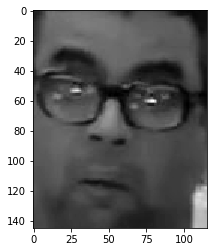

         ID Class
3844  6.jpg   OLD


In [41]:
pred_image('6.jpg')

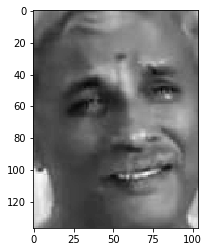

           ID Class
1333  213.jpg   OLD


In [42]:
pred_image('213.jpg')

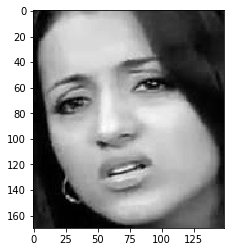

           ID  Class
3936  276.jpg  YOUNG


In [43]:
pred_image('276.jpg')

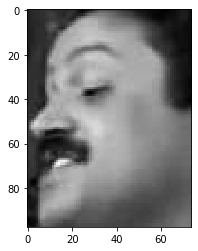

           ID   Class
4724  427.jpg  MIDDLE


In [44]:
pred_image('427.jpg')

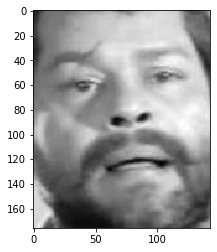

           ID   Class
4646  244.jpg  MIDDLE


In [45]:
pred_image('244.jpg')

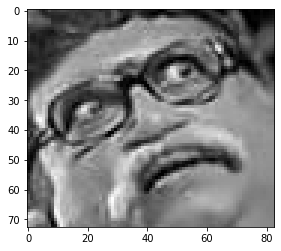

            ID Class
5757  2273.jpg   OLD


In [46]:
pred_image('2273.jpg')

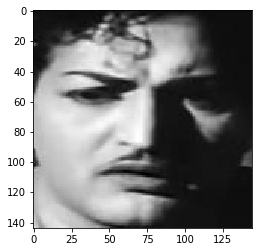

            ID  Class
5272  3698.jpg  YOUNG


In [47]:
pred_image('3698.jpg')

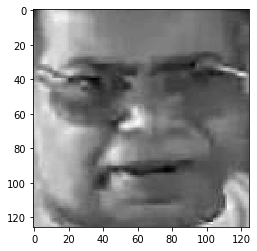

            ID Class
2299  4439.jpg   OLD


In [48]:
pred_image('4439.jpg')